In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<AxesSubplot:>

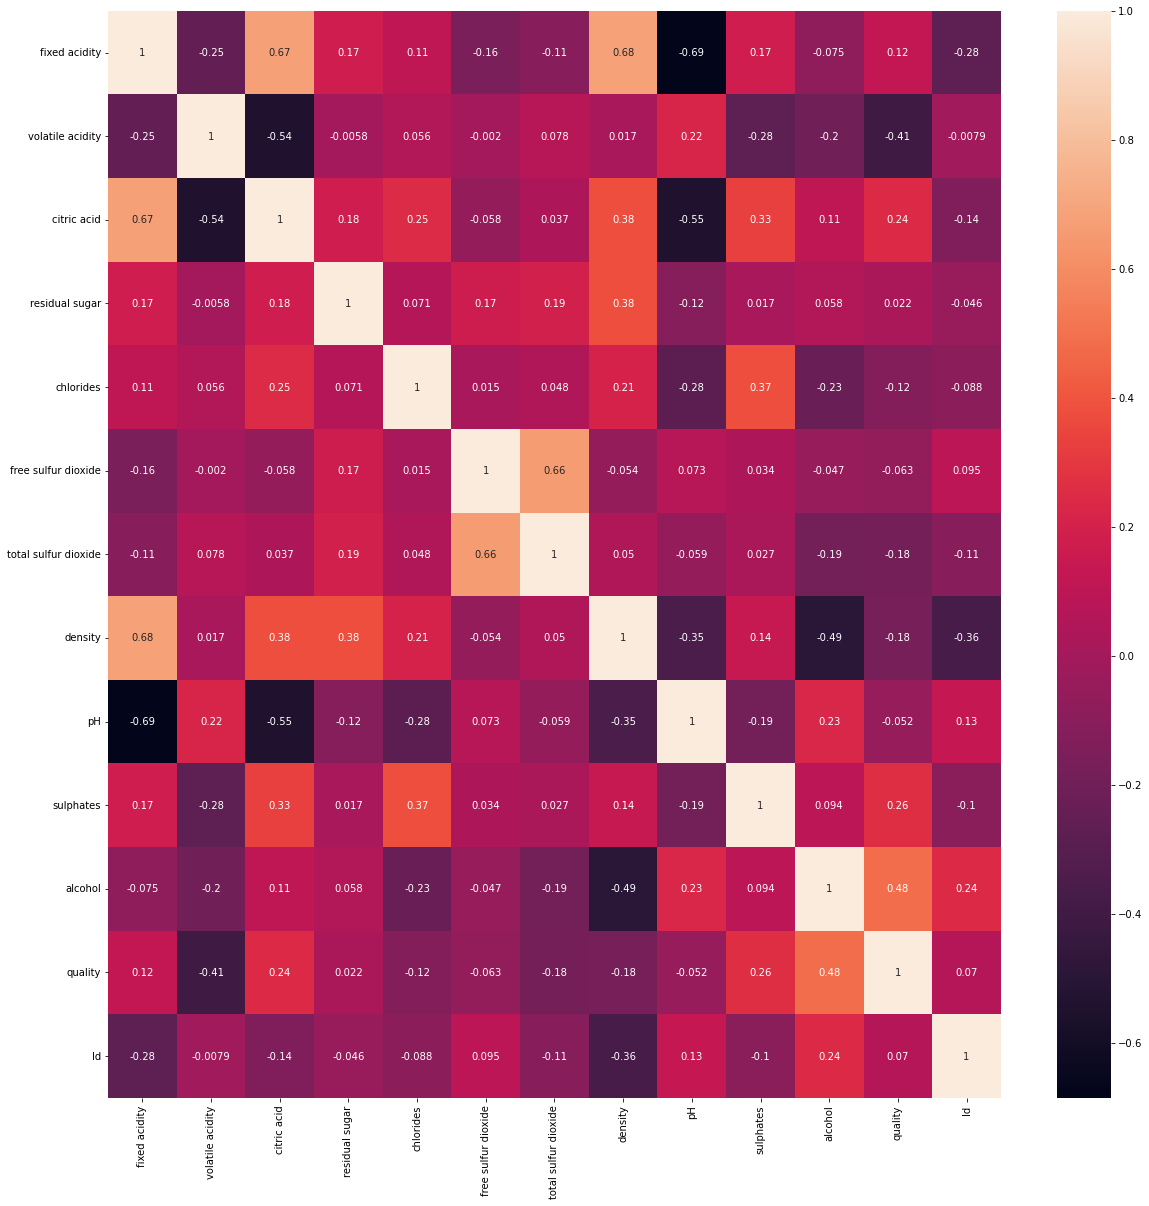

In [5]:
fig,sx=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [6]:
df.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Id                      0.069708
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

Text(0, 0.5, 'quality')

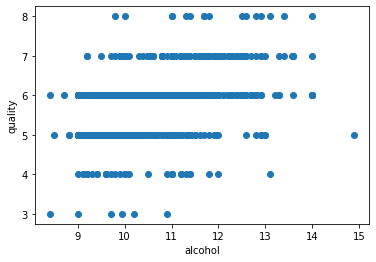

In [7]:
plt.scatter(x=df['alcohol'],y=df['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')

In [8]:
df[(df['quality']>=5)&(df['alcohol']>14)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
462,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,652


Text(0, 0.5, 'quality')

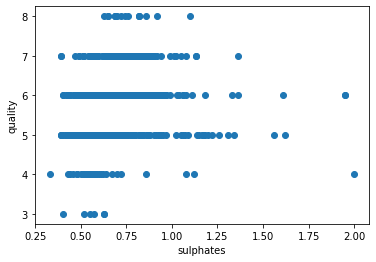

In [9]:
plt.scatter(x=df['sulphates'],y=df['quality'])
plt.xlabel('sulphates')
plt.ylabel('quality')

In [10]:
df[(df['quality']>=5)&(df['sulphates']>1.75)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
59,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6,86
64,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6,91


In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [15]:
np.random.seed(10)


x=df.drop(['quality','Id'],axis=1)
y=df['quality']


model=LinearRegression()
train_preds=[]
test_preds=[]

for i in range(1,7):
    poly=PolynomialFeatures(degree=i,include_bias=False)
    converted_x=poly.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(converted_x,y,test_size=0.3,random_state=10)
    model.fit(x_train,y_train)
    train_preds.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    test_preds.append(np.sqrt(mean_squared_error(y_test,model.predict(x_test))))

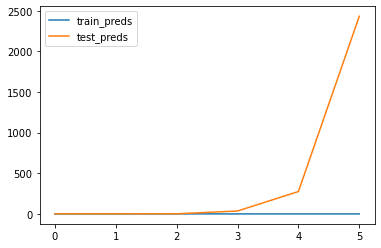

In [16]:
plt.plot(train_preds,label='train_preds')
plt.plot(test_preds,label='test_preds')
plt.legend()

In [17]:
np.random.seed(10)


x=df.drop('quality',axis=1)
y=df['quality']


poly=PolynomialFeatures(degree=2,include_bias=False)
converted_x=poly.fit_transform(x)


x_train,x_test,y_train,y_test=train_test_split(converted_x,y,test_size=0.3,random_state=10)

In [22]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}


clf = RandomForestRegressor(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [23]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [24]:
rs_clf.score(x_test,y_test)

0.5205552629124136

In [ ]:
grid_2 = {'n_estimators': [1200, 1150, 1250],
          'max_depth': ['sqrt', None],
          'max_features': ['sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestRegressor(n_jobs=1)
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)
gs_clf.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.3s
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.3s
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1150; total time=   0.3s
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1150; total time=   0.3s
[CV] END max_depth=sqrt, max_features=sqrt, min_samples_leaf=2, min_samples_sp